# Loading dan Extracting Data .tar from Drive

In [1]:
import gdown
import os
import tarfile

# ID file Google Drive
file_id = '1xq6dDveKudBoJoO1dpVyE8dWIDiDyLIK'

# Nama file dan path
output_filename = 'dataset.tar'  # atau dataset.tar.gz jika itu gzip
output_path = '/content/' + output_filename

# Download file
try:
    gdown.download(id=file_id, output=output_path, quiet=False)
    print(f"File berhasil diunduh ke: {output_path}")

    # Ekstrak file .tar atau .tar.gz
    if tarfile.is_tarfile(output_path):
        with tarfile.open(output_path, 'r:*') as tar:
            tar.extractall(path='/content/dataset_extracted/')
        print("File .tar berhasil diekstrak ke: /content/dataset_extracted/")
    else:
        print("File yang diunduh bukan file .tar/.tar.gz yang valid.")

except Exception as e:
    print(f"Terjadi kesalahan saat mengunduh atau mengekstrak: {e}")

Downloading...
From (original): https://drive.google.com/uc?id=1xq6dDveKudBoJoO1dpVyE8dWIDiDyLIK
From (redirected): https://drive.google.com/uc?id=1xq6dDveKudBoJoO1dpVyE8dWIDiDyLIK&confirm=t&uuid=1bf316f6-938a-4890-98e0-0f1008ba2fae
To: /content/dataset.tar
100%|██████████| 608M/608M [00:07<00:00, 77.9MB/s]


File berhasil diunduh ke: /content/dataset.tar
File .tar berhasil diekstrak ke: /content/dataset_extracted/


In [2]:
!ls -lh /content/dataset_extracted

total 24K
-rw-r--r-- 1 root root  200 Oct 24  2023 LICENSE.md
-rw-r--r-- 1 root root  498 Oct 24  2023 meta.json
-rw-r--r-- 1 root root  114 Oct 24  2023 README.md
drwxr-xr-x 4 root root 4.0K Jul 10 01:30 test
drwxr-xr-x 4 root root 4.0K Jul 10 01:30 train
drwxr-xr-x 4 root root 4.0K Jul 10 01:30 valid


In [3]:
import os

test_path = '/content/dataset_extracted/test'
classes = sorted(os.listdir(test_path))

print(f"Terdapat {len(classes)} kelas di folder test:")
for cls in classes:
    print("-", cls)

Terdapat 2 kelas di folder test:
- ann
- img


# Data Advanture

In [4]:
base = "/content/dataset_extracted/"

splits = ["train", "test", "valid"]

for split in splits:
  img_dir = os.path.join(base, split, "img")
  ann_dir = os.path.join(base, split, "ann")

  img_count = len([f for f in os.listdir(img_dir) if f.endswith (('.jpg', '.png', 'jpeg'))])
  ann_count = len([f for f in os.listdir(ann_dir) if f.endswith (('.json'))])

  print(f"{split.upper()} set:")
  print(f"  - Jumlah Gambar : {img_count}")
  print(f"  - Jumlah Label  : {ann_count}")
  print("-" * 30)

TRAIN set:
  - Jumlah Gambar : 7350
  - Jumlah Label  : 7350
------------------------------
TEST set:
  - Jumlah Gambar : 1575
  - Jumlah Label  : 1575
------------------------------
VALID set:
  - Jumlah Gambar : 1575
  - Jumlah Label  : 1575
------------------------------


In [5]:
img_path = '/content/dataset_extracted/test/img'
img_files = os.listdir(img_path)
print(f"Total gambar: {len(img_files)}")
print("Contoh nama file gambar:", img_files[:5])

Total gambar: 1575
Contoh nama file gambar: ['helmet_jacket_08190.jpg', 'helmet_jacket_08879.jpg', 'helmet_jacket_08493.jpg', 'helmet_jacket_08803.jpg', 'helmet_jacket_07829.jpg']


In [6]:
ann_path = '/content/dataset_extracted/test/ann'
ann_files = os.listdir(ann_path)
print(f"Total file anotasi: {len(ann_files)}")
print("Contoh nama file anotasi:", ann_files[:5])

Total file anotasi: 1575
Contoh nama file anotasi: ['helmet_jacket_07968.jpg.json', 'helmet_jacket_08166.jpg.json', 'helmet_jacket_07482.jpg.json', 'helmet_jacket_08112.jpg.json', 'helmet_jacket_08781.jpg.json']


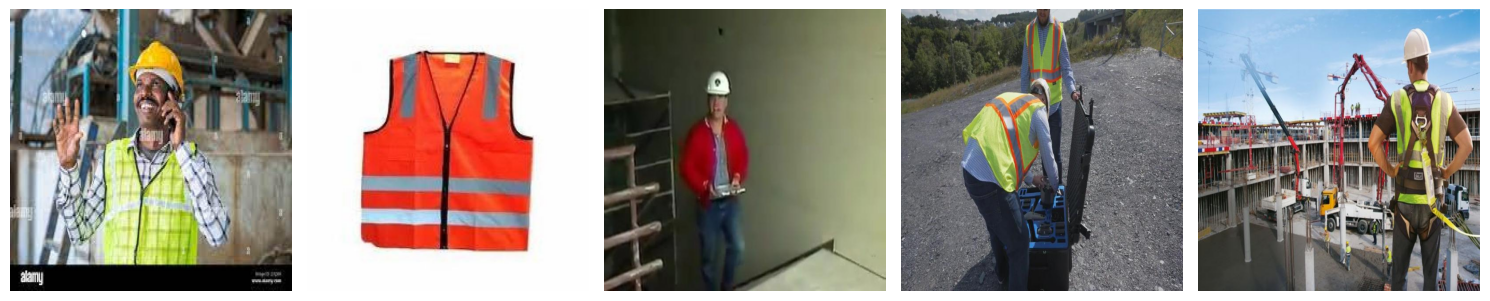

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img_path = '/content/dataset_extracted/test/img'
img_files = sorted(os.listdir(img_path))

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
  img_file = os.path.join(img_path, img_files[i])
  img = mpimg.imread(img_file)

  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import json

with open('/content/dataset_extracted/test/ann/helmet_jacket_07906.jpg.json') as f:
  data = json.load(f)

print(json.dumps(data, indent=2))

{
  "description": "",
  "tags": [],
  "size": {
    "height": 640,
    "width": 640
  },
  "objects": [
    {
      "id": 75370533,
      "classId": 6488390,
      "description": "",
      "geometryType": "rectangle",
      "labelerLogin": "inbox@datasetninja.com",
      "createdAt": "2023-10-23T10:39:58.429Z",
      "updatedAt": "2023-10-23T10:39:58.429Z",
      "tags": [],
      "classTitle": "reflective_jacket",
      "points": {
        "exterior": [
          [
            104,
            421
          ],
          [
            147,
            483
          ]
        ],
        "interior": []
      }
    },
    {
      "id": 75370532,
      "classId": 6488390,
      "description": "",
      "geometryType": "rectangle",
      "labelerLogin": "inbox@datasetninja.com",
      "createdAt": "2023-10-23T10:39:58.427Z",
      "updatedAt": "2023-10-23T10:39:58.427Z",
      "tags": [],
      "classTitle": "reflective_jacket",
      "points": {
        "exterior": [
          [
         

In [9]:
ann_dir = '/content/dataset_extracted/test/ann'
label_set = set()

for file in os.listdir(ann_dir):
    with open(os.path.join(ann_dir, file)) as f:
        data = json.load(f)
        for obj in data["objects"]:
            label_set.add(obj["classTitle"])

print(sorted(label_set))

['reflective_jacket', 'safety_helmet']


In [10]:
# print(f"Contoh file json di folder {ann_in}:")
# print(os.listdir(ann_in)[:5])

# print(f"Contoh file gambar di folder {img_in}:")
# print(os.listdir(img_in)[:5])

# Data Preperation for YOLO Training

In [11]:
img_dir = '/content/dataset_extracted/train/img'
label_dir = '/content/dataset_extracted/train/ann'

img_names = [os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

label_names = [
    os.path.splitext(os.path.splitext(f)[0])[0]
    for f in os.listdir(label_dir)
    if f.endswith('.json')
]

img_set = set(img_names)
label_set = set(label_names)

missing_labels = img_set - label_set

missing_images = label_set - img_set

print(f"🟥 Jumlah gambar tanpa label (.json): {len(missing_labels)}")
print("Contoh:")
for i, name in enumerate(sorted(missing_labels)):
    print(f"- {name}.jpg/.png")
    if i == 9: break

print("\n🟦 Jumlah label tanpa gambar (.jpg/.png):", len(missing_images))
print("Contoh:")
for i, name in enumerate(sorted(missing_images)):
    print(f"- {name}.json")
    if i == 9: break

🟥 Jumlah gambar tanpa label (.json): 0
Contoh:

🟦 Jumlah label tanpa gambar (.jpg/.png): 0
Contoh:


In [26]:
import shutil

label2id = {
    'reflective_jacket': 0,
    'safety_helmet': 1
}

base_dir = "/content/dataset_extracted"
output_dir = "/content/dataset"

splits = ['train', 'test', 'valid']

for split in splits:
  img_in = os.path.join(base_dir, split, 'img')
  ann_in = os.path.join(base_dir, split, 'ann')

  img_out = os.path.join(output_dir, 'images', split)
  ann_out = os.path.join(output_dir, 'labels', split)

  os.makedirs(img_out, exist_ok=True)
  os.makedirs(ann_out, exist_ok=True)

  for json_file in os.listdir(ann_in):
    if not json_file.endswith('.json'):
      continue

    base_name = os.path.splitext(json_file)[0]
    ann_path = os.path.join(ann_in, json_file)
    img_path = os.path.join(img_in, base_name)

    if not os.path.exists(img_path):
      img_path += '.jpg'
    if not os.path.exists(img_path):
      img_path += '.png'
    if not os.path.exists(img_path):
            print(f"Skip: {base_name} not found as image")
            continue

    shutil.copy(img_path, os.path.join(img_out, os.path.basename(img_path)))

    with open(ann_path) as f:
      data = json.load(f)

    h, w = data['size']['height'], data['size']['width']
    label_lines = []

    for obj in data['objects']:
            cls = obj['classTitle']
            if cls not in label2id:
                continue

            class_id = label2id[cls]
            (x1, y1), (x2, y2) = obj['points']['exterior']

            x_center = ((x1 + x2) / 2) / w
            y_center = ((y1 + y2) / 2) / h
            box_w = abs(x2 - x1) / w
            box_h = abs(y2 - y1) / h

            line = f"{class_id} {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}"
            label_lines.append(line)

    with open(os.path.join(ann_out, base_name + '.txt'), 'w') as f:
      f.write("\n".join(label_lines))

In [27]:
for split in ['train', 'valid', 'test']:
    label_dir = f'/content/dataset/labels/{split}'

    for filename in os.listdir(label_dir):
        if filename.endswith('.jpg.txt'):
            new_name = filename.replace('.jpg.txt', '.txt')
            os.rename(
                os.path.join(label_dir, filename),
                os.path.join(label_dir, new_name)
            )
    print(f"[OK] Rename selesai untuk folder: {split}")

[OK] Rename selesai untuk folder: train
[OK] Rename selesai untuk folder: valid
[OK] Rename selesai untuk folder: test


In [28]:
base = "/content/dataset/"

splits = ["train", "test", "valid"]

for split in splits:
  img_dir = os.path.join(base, "images", split)
  labels_dir = os.path.join(base, "labels", split)

  img_count = len([f for f in os.listdir(img_dir) if f.endswith (('.jpg', '.png', 'jpeg'))])
  labels_count = len([f for f in os.listdir(labels_dir) if f.endswith (('.txt'))])

  print(f"{split.upper()} set:")
  print(f"  - Jumlah Gambar : {img_count}")
  print(f"  - Jumlah Label  : {labels_count}")
  print("-" * 30)

TRAIN set:
  - Jumlah Gambar : 7350
  - Jumlah Label  : 7350
------------------------------
TEST set:
  - Jumlah Gambar : 1575
  - Jumlah Label  : 1575
------------------------------
VALID set:
  - Jumlah Gambar : 1575
  - Jumlah Label  : 1575
------------------------------


In [23]:
data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/valid
test: /content/dataset/images/test
nc: 2
names: ['reflective_jacket', 'safety_helmet']
"""
with open('/content/data.yaml','w') as f:
  f.write(data_yaml)

# Data Training

In [24]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [29]:
model = YOLO('yolov8n.pt')
model.train(data='/content/data.yaml', epochs=30, imgsz=640)

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/dataset/labels/train.cache... 7350 images, 33 backgrounds, 0 corrupt: 100%|██████████| 7350/7350 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 779.5±407.7 MB/s, size: 49.5 KB)


val: Scanning /content/dataset/labels/valid... 1575 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1575/1575 [00:01<00:00, 1177.56it/s]

val: New cache created: /content/dataset/labels/valid.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.13G      1.254      1.547      1.278         22        640: 100%|██████████| 460/460 [02:11<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


                   all       1575       5292      0.746      0.701      0.764      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.61G      1.232      1.151       1.25         28        640: 100%|██████████| 460/460 [02:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


                   all       1575       5292      0.804      0.694      0.783        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.63G      1.221      1.065      1.253         35        640: 100%|██████████| 460/460 [02:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.01it/s]


                   all       1575       5292      0.813      0.731      0.817      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.64G      1.191       1.02       1.24         43        640: 100%|██████████| 460/460 [02:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]


                   all       1575       5292      0.835      0.791      0.875      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.66G      1.158      0.953      1.216         42        640: 100%|██████████| 460/460 [02:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]


                   all       1575       5292      0.843      0.812      0.885      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.68G      1.126     0.9096      1.197         24        640: 100%|██████████| 460/460 [02:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.66it/s]

                   all       1575       5292       0.82      0.786      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.7G      1.094     0.8696      1.183         29        640: 100%|██████████| 460/460 [02:06<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]

                   all       1575       5292      0.865      0.852      0.912      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.71G       1.09      0.849      1.177         17        640: 100%|██████████| 460/460 [02:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]

                   all       1575       5292      0.874      0.852       0.92       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.73G      1.061     0.8108      1.163         38        640: 100%|██████████| 460/460 [02:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]

                   all       1575       5292       0.89      0.842      0.918       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.75G      1.048     0.7853      1.148         22        640: 100%|██████████| 460/460 [02:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.81it/s]

                   all       1575       5292      0.885      0.873      0.937      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.76G      1.032     0.7718      1.147         20        640: 100%|██████████| 460/460 [02:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]

                   all       1575       5292      0.888      0.863      0.928      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.78G      1.027      0.759      1.143         19        640: 100%|██████████| 460/460 [02:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]

                   all       1575       5292      0.903      0.873       0.94      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.8G      1.001     0.7376      1.131         29        640: 100%|██████████| 460/460 [02:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.73it/s]

                   all       1575       5292      0.902      0.866      0.936      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.82G     0.9942     0.7209      1.123         30        640: 100%|██████████| 460/460 [02:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.64it/s]


                   all       1575       5292      0.903      0.875      0.943      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.83G     0.9813     0.7066      1.114         60        640: 100%|██████████| 460/460 [02:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]

                   all       1575       5292      0.907      0.876      0.946       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.85G     0.9745     0.6972      1.114         26        640: 100%|██████████| 460/460 [02:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]

                   all       1575       5292      0.909       0.88      0.946      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.87G     0.9553     0.6818      1.105         62        640: 100%|██████████| 460/460 [02:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.70it/s]

                   all       1575       5292      0.908      0.878      0.948      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.88G     0.9478     0.6644      1.098         28        640: 100%|██████████| 460/460 [02:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.69it/s]

                   all       1575       5292      0.916       0.89      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.9G     0.9378     0.6557      1.096         29        640: 100%|██████████| 460/460 [02:08<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]

                   all       1575       5292      0.922      0.895      0.954      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.92G     0.9342     0.6499      1.092         31        640: 100%|██████████| 460/460 [02:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.68it/s]

                   all       1575       5292      0.919      0.892      0.953      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.94G     0.8723     0.5532      1.057         32        640: 100%|██████████| 460/460 [02:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]

                   all       1575       5292      0.916      0.895      0.953      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.96G     0.8568      0.539      1.044         16        640: 100%|██████████| 460/460 [01:58<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]

                   all       1575       5292      0.922      0.899      0.953      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.97G      0.836     0.5218      1.041         14        640: 100%|██████████| 460/460 [01:58<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.73it/s]

                   all       1575       5292      0.932      0.886      0.956      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.99G     0.8225     0.5024      1.032         13        640: 100%|██████████| 460/460 [01:55<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]

                   all       1575       5292      0.932      0.895       0.96      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         3G     0.8067     0.4923      1.022         22        640: 100%|██████████| 460/460 [01:54<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]

                   all       1575       5292       0.92      0.903       0.96      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.02G     0.7967     0.4839      1.019         19        640: 100%|██████████| 460/460 [01:52<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]

                   all       1575       5292      0.932      0.898      0.961      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.04G     0.7855     0.4753      1.013         20        640: 100%|██████████| 460/460 [01:55<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]

                   all       1575       5292      0.927      0.905      0.962      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.05G     0.7675     0.4582      1.003         34        640: 100%|██████████| 460/460 [01:55<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]

                   all       1575       5292      0.926      0.907      0.962       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.07G     0.7643      0.456      1.004         25        640: 100%|██████████| 460/460 [01:57<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]

                   all       1575       5292      0.934      0.904      0.964      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.09G     0.7466     0.4485     0.9965         13        640: 100%|██████████| 460/460 [01:55<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.71it/s]


                   all       1575       5292       0.93      0.908      0.963      0.774

30 epochs completed in 1.132 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


                   all       1575       5292      0.929      0.908      0.963      0.774
     reflective_jacket       1317       2326      0.918      0.897      0.956      0.775
         safety_helmet       1290       2966      0.941      0.918      0.971      0.774
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecd04643250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [31]:
import pandas as pd

csv_path = 'runs/detect/train2/results.csv'

df = pd.read_csv(csv_path)
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,147.198,1.25359,1.54671,1.27792,0.74604,0.70134,0.76431,0.49421,1.18438,1.16598,1.24289,0.000554,0.000554,0.000554
1,2,284.038,1.23187,1.15064,1.25035,0.80431,0.69395,0.78349,0.50010,1.24327,1.12180,1.30003,0.001073,0.001073,0.001073
2,3,424.803,1.22126,1.06455,1.25292,0.81327,0.73126,0.81718,0.47686,1.32829,1.02608,1.33181,0.001556,0.001556,0.001556
3,4,563.033,1.19096,1.02004,1.23994,0.83531,0.79060,0.87456,0.58745,1.11056,0.85347,1.18342,0.001502,0.001502,0.001502
4,5,700.011,1.15754,0.95298,1.21559,0.84267,0.81248,0.88514,0.61099,1.07854,0.79579,1.15153,0.001447,0.001447,0.001447
5,6,837.746,1.12560,0.90958,1.19719,0.82027,0.78613,0.86775,0.58792,1.08746,0.83153,1.17075,0.001392,0.001392,0.001392
6,7,977.347,1.09414,0.86956,1.18250,0.86464,0.85207,0.91247,0.64646,1.03765,0.71065,1.12782,0.001337,0.001337,0.001337
7,8,1112.410,1.08986,0.84904,1.17690,0.87352,0.85170,0.92046,0.66046,1.01008,0.69391,1.10751,0.001282,0.001282,0.001282
8,9,1249.680,1.06057,0.81079,1.16263,0.88983,0.84154,0.91832,0.66957,0.97764,0.67105,1.09471,0.001227,0.001227,0.001227
9,10,1384.810,1.04756,0.78535,1.14782,0.88472,0.87341,0.93663,0.67743,0.96406,0.63172,1.07725,0.001172,0.001172,0.001172


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 30 non-null     int64  
 1   time                  30 non-null     float64
 2   train/box_loss        30 non-null     float64
 3   train/cls_loss        30 non-null     float64
 4   train/dfl_loss        30 non-null     float64
 5   metrics/precision(B)  30 non-null     float64
 6   metrics/recall(B)     30 non-null     float64
 7   metrics/mAP50(B)      30 non-null     float64
 8   metrics/mAP50-95(B)   30 non-null     float64
 9   val/box_loss          30 non-null     float64
 10  val/cls_loss          30 non-null     float64
 11  val/dfl_loss          30 non-null     float64
 12  lr/pg0                30 non-null     float64
 13  lr/pg1                30 non-null     float64
 14  lr/pg2                30 non-null     float64
dtypes: float64(14), int64(1)


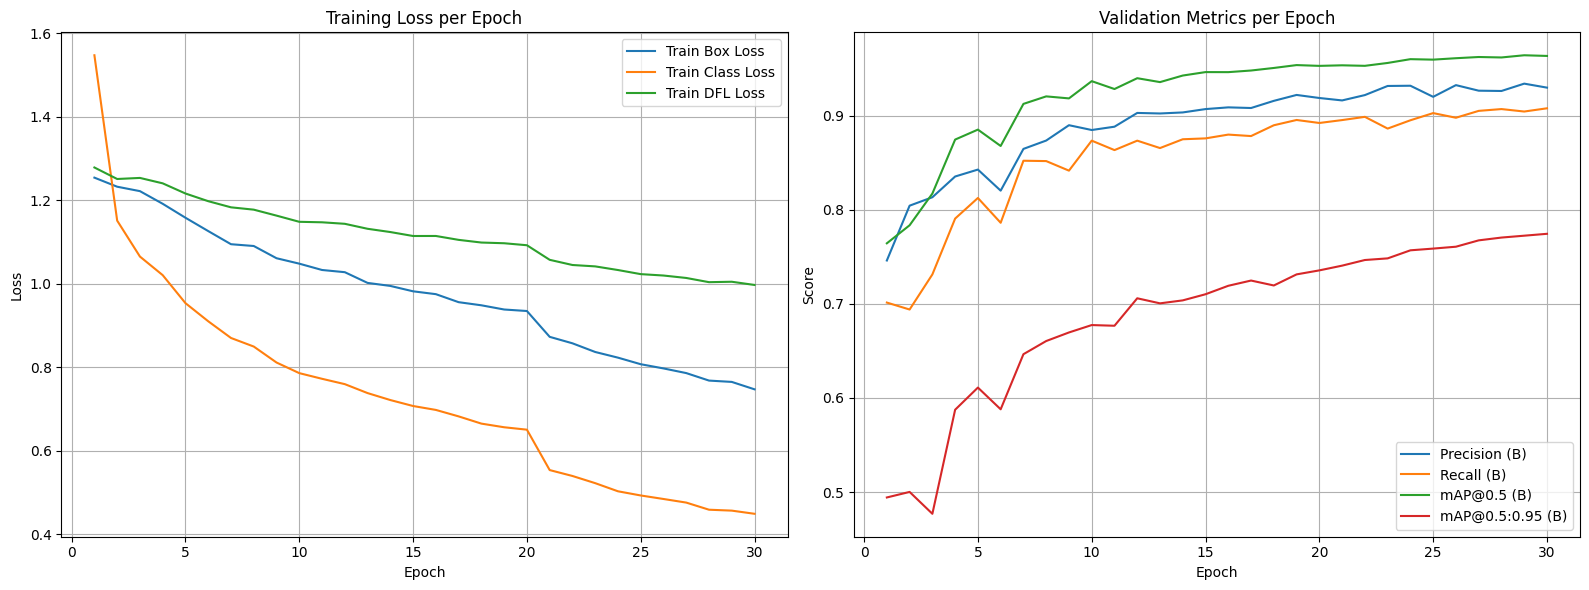

In [34]:

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision (B)')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall (B)')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5 (B)')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
import os

weight_dir = 'runs/detect/train2/weights'
print("Model yang tersedia:")
for f in os.listdir(weight_dir):
    print("-", f)

Model yang tersedia:
- last.pt
- best.pt


In [38]:
valid_dir = "/content/dataset/images/valid"
sample_images = [f for f in os.listdir(valid_dir) if f.endswith(('.jpg', '.png'))]

print("Contoh file yang tersedia:")
for f in sample_images[:5]:
    print(f)

Contoh file yang tersedia:
helmet_jacket_10000.jpg
helmet_jacket_10453.jpg
helmet_jacket_09643.jpg
helmet_jacket_10301.jpg
helmet_jacket_10176.jpg



image 1/1 /content/dataset/images/valid/helmet_jacket_10000.jpg: 640x640 1 reflective_jacket, 1 safety_helmet, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


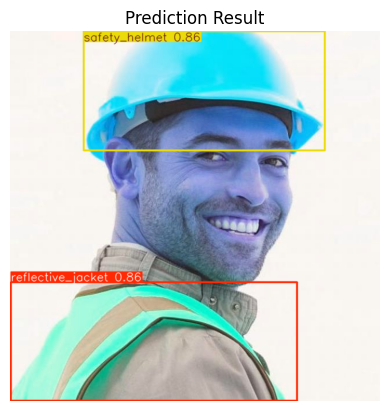

In [41]:
model = YOLO("runs/detect/train2/weights/best.pt")

img_path = "/content/dataset/images/valid/helmet_jacket_10000.jpg"
results = model(img_path, conf=0.5)

res_plotted = results[0].plot()
plt.imshow(res_plotted)
plt.axis("off")
plt.title("Prediction Result")
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')
test_path = '/content/dataset/images/test'
model.predict(source=test_path, save=True, conf=0.5)

In [42]:
from google.colab import files

model_path = 'runs/detect/train2/weights/best.pt'
yaml_path = 'data.yaml'

shutil.copy(model_path, '/content/best.pt')

files.download('/content/best.pt')
files.download('/content/data.yaml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>